In [1]:
# Import packages and implement notebook settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(shuffle = True, random_state = 0)

pd.set_option('display.max_rows', 1000); pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)

%matplotlib inline 




# Data Import

In [2]:
import os

current_directory = os.getcwd()

dataframes = ['features.csv', 'features_dum_drop.csv', 'features_dum_nodrop.csv', 'features_encoded.csv',
              'response.csv',
              'X_train_drop.csv', 'X_test_drop.csv', 'y_train_drop.csv', 'y_test_drop.csv',
              'X_train_nodrop.csv', 'X_test_nodrop.csv', 'y_train_nodrop.csv', 'y_test_nodrop.csv',
              'X_train_encoded.csv', 'X_test_encoded.csv', 'y_train_encoded.csv', 'y_test_encoded.csv',
              'X_train_drop_scaled.csv', 'X_test_drop_scaled.csv',
              'X_train_nodrop_scaled.csv', 'X_test_nodrop_scaled.csv']

loaded_dataframes = {}

for file_name in dataframes:
    
    df_name = file_name.split('.csv')[0]
    file_path = os.path.join(current_directory, file_name)
    loaded_dataframes[df_name] = pd.read_csv(file_path, sep='\t')



In [3]:
features = loaded_dataframes['features']
features_dum_drop = loaded_dataframes['features_dum_drop']
features_dum_nodrop = loaded_dataframes['features_dum_nodrop']
features_encoded = loaded_dataframes['features_encoded']

response = loaded_dataframes['response']


X_train_drop = loaded_dataframes['X_train_drop']
X_test_drop = loaded_dataframes['X_test_drop']
y_train_drop = loaded_dataframes['y_train_drop']['SalePrice']
y_test_drop = loaded_dataframes['y_test_drop']['SalePrice']


# Sequential Feature Selector

In [4]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

test_score = []
train_score = []
feature_names_list = []

for feat_count in list(range(15)):
    selector = SequentialFeatureSelector(LinearRegression(),
                                         n_features_to_select= feat_count + 1,
                                         direction='forward',
                                         scoring= 'r2',
                                         cv=5
                                        )
    selector.fit_transform(X_train_drop,np.log(y_train_drop))
    feature_names = X_train_drop.columns
    feature_names_list.append([feature_names[selector.get_support()]])
    lm = LinearRegression()
    lm.fit(X = X_train_drop.loc[:,feature_names[selector.get_support()]], y = np.log(y_train_drop))
    train_score.append(lm.score(X_train_drop.loc[:,feature_names[selector.get_support()]], np.log(y_train_drop)))
    test_score.append(lm.score(X_test_drop.loc[:,feature_names[selector.get_support()]], np.log(y_test_drop)))

selector_df = pd.DataFrame(data = {'train_score': train_score, 'test_score': test_score, 'features_list': feature_names_list}).reset_index().rename(columns = {'index': 'number_of_features'})
selector_df['number_of_features'] = selector_df['number_of_features'] + 1
selector_df = selector_df.melt(id_vars = ['number_of_features','features_list'], value_vars = ['train_score', 'test_score'], var_name = 'score_type', value_name = 'score')

selector_df


,number_of_features,features_list,score_type,score
0,1,[[OverallQual]],train_score,0.673303
1,2,"[[OverallQual, HighQualFinSF]]",train_score,0.814626
2,3,"[[OverallQual, BsmtUnfSF, HighQualFinSF]]",train_score,0.837598
3,4,"[[OverallQual, BsmtUnfSF, HighQualFinSF, Years...",train_score,0.856714
4,5,"[[OverallQual, OverallCond, BsmtUnfSF, HighQua...",train_score,0.877271
5,6,"[[OverallQual, OverallCond, BsmtUnfSF, GarageC...",train_score,0.885327
6,7,"[[OverallQual, OverallCond, BsmtUnfSF, Firepla...",train_score,0.890582
7,8,"[[BldgType_Twnhs, OverallQual, OverallCond, Bs...",train_score,0.894644
8,9,"[[Neighborhood_Crawfor, BldgType_Twnhs, Overal...",train_score,0.898056
9,10,"[[Neighborhood_Crawfor, BldgType_Twnhs, Heatin...",train_score,0.900480


Text(0, 0.5, 'R2')

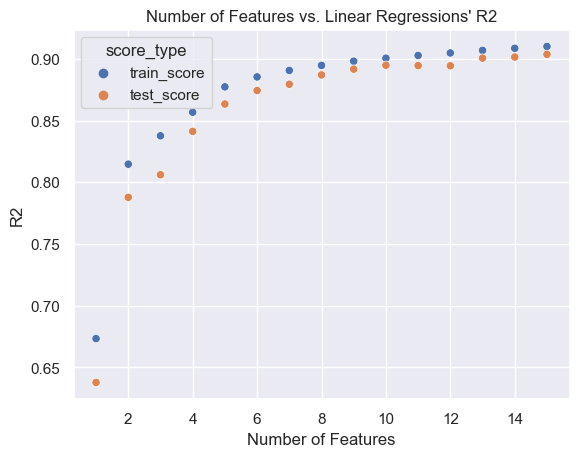

In [34]:
sns.set_theme(style="darkgrid")


sns.scatterplot(data = selector_df, y = 'score', x = 'number_of_features', hue = 'score_type')
plt.title("Number of Features vs. Linear Regressions' R2")
plt.xlabel('Number of Features')
plt.ylabel('R2')

# Multiple Linear Regressions


## No Transformations


In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X = X_train_drop, y = y_train_drop)


LinearRegression()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   3.,   8.,  15.,  65., 222., 601., 777., 261.,  64.,
         21.,   7.,   5.,   2.,   3.,   2.,   0.,   3.]),
 array([-253214.16055823, -239962.82404943, -226711.48754063,
        -213460.15103183, -200208.81452303, -186957.47801423,
        -173706.14150543, -160454.80499663, -147203.46848783,
        -133952.13197903, -120700.79547023, -107449.45896143,
         -94198.12245263,  -80946.78594383,  -67695.44943503,
         -54444.11292623,  -41192.77641743,  -27941.43990863,
         -14690.10339983,   -1438.76689103,   11812.56961777,
          25063.90612657,   38315.24263537,   51566.57914417,
          64817.91565297,   78069.25216177,   91320.58867057,
         104571.92517937,  117823.26168817,  131074.59819697,
         144325.93470577]),
 <BarContainer object of 30 artists>)

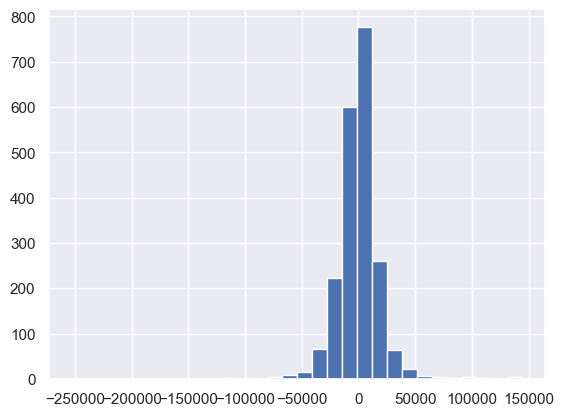

In [7]:
residuals = y_train_drop - lm.predict(X_train_drop)
plt.hist(residuals, bins = 30)

In [8]:
print('Train R^2 is equal to %.3f' %(lm.score(X_train_drop, y_train_drop)))
print('Test R^2 is equal to %.3f' %(lm.score(X_test_drop, y_test_drop)))


Train R^2 is equal to 0.939
Test R^2 is equal to 0.916


In [9]:
import statsmodels.api as sm
x = sm.add_constant(X_train_drop)

model = sm.OLS(y_train_drop, x.loc[:,x.columns.values].astype(float))
results = model.fit()
print(results.summary()) # How to print out the summary report

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:18:41   Log-Likelihood:                -23242.
No. Observations:                2062   AIC:                         4.701e+04
Df Residuals:                    1801   BIC:                         4.848e+04
Df Model:                         260                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [10]:
pValues = results.pvalues
sorted(zip(pValues[pValues < 0.05].index, pValues[pValues < 0.05]), key=lambda x: x[1])


[('OverallCond', 1.3261999991141851e-17),
 ('OverallQual', 3.7762052429275036e-17),
 ('BsmtQual_Gd', 1.7180136340209438e-15),
 ('ExterQual_Gd', 9.356966502932049e-15),
 ('ExterQual_TA', 3.452175709413006e-14),
 ('LotArea', 1.1376043083487637e-10),
 ('KitchenQual_TA', 1.32112955019785e-10),
 ('Neighborhood_StoneBr', 2.1186319360531217e-10),
 ('KitchenQual_Gd', 1.0957277685222808e-09),
 ('Condition2_PosN', 1.2412888512645886e-09),
 ('Neighborhood_GrnHill', 2.1971862099650163e-09),
 ('BsmtQual_TA', 6.002211040181448e-08),
 ('RoofMatl_WdShngl', 7.339420908710633e-08),
 ('MasVnrArea', 1.7410516907121193e-07),
 ('PoolQC_No Pool', 1.9389507268683477e-07),
 ('BsmtExposure_Gd', 2.84364397920812e-07),
 ('Fireplaces', 1.307218363209878e-06),
 ('Neighborhood_NoRidge', 7.88547802654039e-06),
 ('Condition1_Norm', 2.6794570650257257e-05),
 ('2ndFlrSF', 2.692057614817172e-05),
 ('KitchenQual_Fa', 2.88010743087246e-05),
 ('Neighborhood_Somerst', 3.463454775336956e-05),
 ('GarageQual_TA', 4.238600593646

In [11]:
# Create list of columns that had significant impact on response

signif_feat_list = []

for feat in pValues[pValues < 0.05].index:
    if '_' in feat:
        signif_feat_list.append(feat.split('_')[0])
    else:
        signif_feat_list.append(feat)

signif_feat_list = list(set(signif_feat_list))

In [12]:
cat_features_col = features.select_dtypes(include=['object']).columns
(cat_features_col)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [13]:
def list_intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [14]:
list_intersection(signif_feat_list, cat_features_col)

['HeatingQC',
 'GarageQual',
 'Condition1',
 'PoolQC',
 'SaleCondition',
 'BsmtExposure',
 'GarageFinish',
 'MiscFeature',
 'BsmtQual',
 'Condition2',
 'BldgType',
 'GarageCond',
 'ExterQual',
 'RoofMatl',
 'Neighborhood',
 'LotShape',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'HouseStyle',
 'BsmtFinType1',
 'LandSlope',
 'Functional',
 'Street',
 'LotConfig']

Text(0, 0.5, 'Actual SalePrice')

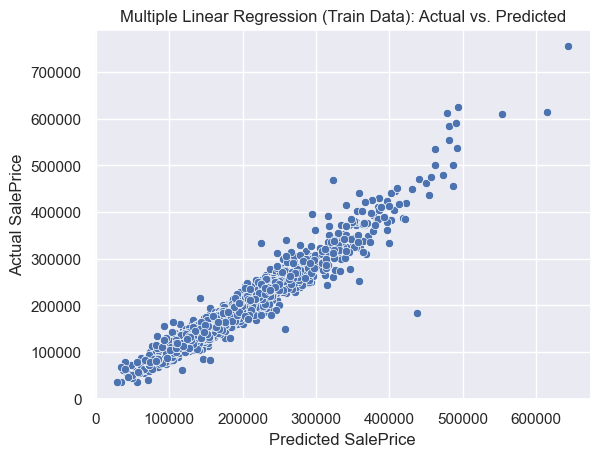

In [15]:
sns.scatterplot(x = lm.predict(X_train_drop), y = y_train_drop)
plt.title('Multiple Linear Regression (Train Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

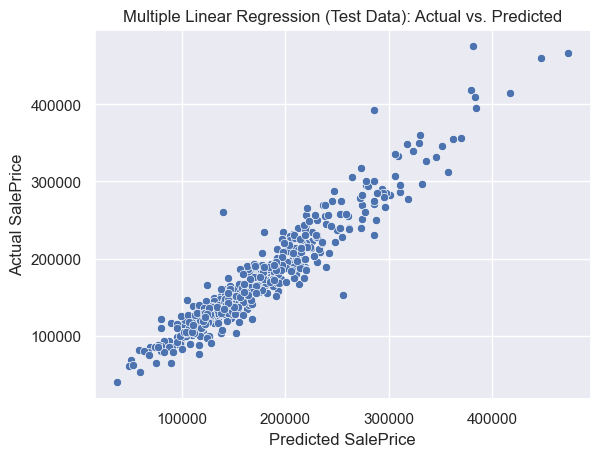

In [16]:
sns.scatterplot(x = lm.predict(X_test_drop), y = y_test_drop)
plt.title('Multiple Linear Regression (Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Log Transformation

In [17]:
lm = LinearRegression()
lm.fit(X = X_train_drop, y = np.log(y_train_drop))


LinearRegression()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   2.,
          2.,   1.,   5.,  10.,  19.,  82., 204., 462., 571., 434., 163.,
         60.,  28.,   5.,   3.,   3.,   0.,   1.,   3.]),
 array([-0.98805722, -0.93713173, -0.88620624, -0.83528075, -0.78435526,
        -0.73342976, -0.68250427, -0.63157878, -0.58065329, -0.52972779,
        -0.4788023 , -0.42787681, -0.37695132, -0.32602583, -0.27510033,
        -0.22417484, -0.17324935, -0.12232386, -0.07139837, -0.02047287,
         0.03045262,  0.08137811,  0.1323036 ,  0.18322909,  0.23415459,
         0.28508008,  0.33600557,  0.38693106,  0.43785656,  0.48878205,
         0.53970754]),
 <BarContainer object of 30 artists>)

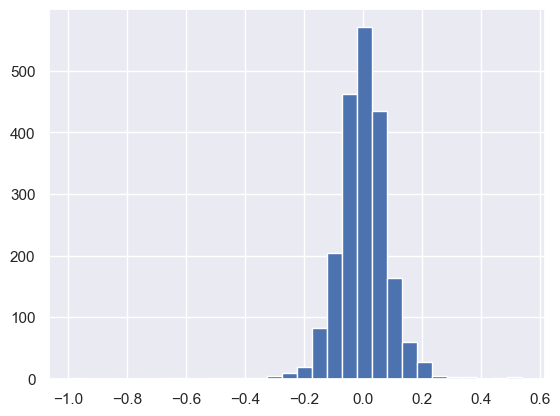

In [18]:
residuals = np.log(y_train_drop) - lm.predict(X_train_drop)
plt.hist(residuals, bins = 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x12fb6ce10>,
 'caps': [<matplotlib.lines.Line2D at 0x12fb6cd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fa637d0>],
 'medians': [<matplotlib.lines.Line2D at 0x12fb6f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x12fb4af10>],
 'means': []}

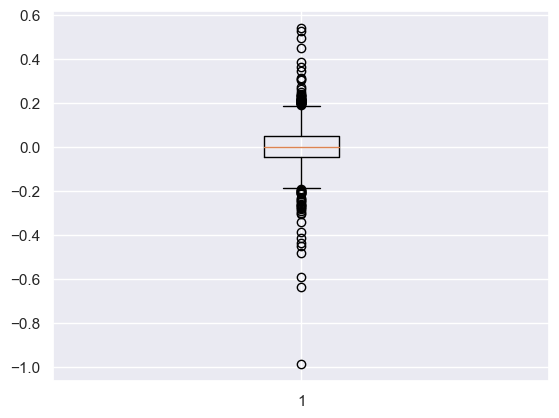

In [19]:
plt.boxplot(residuals)

In [20]:
print('Train R^2 is equal to %.3f' %(lm.score(X_train_drop, np.log(y_train_drop))))
print('Test R^2 is equal to %.3f' %(lm.score(X_test_drop, np.log(y_test_drop))))


Train R^2 is equal to 0.946
Test R^2 is equal to 0.924


In [21]:
lm_train_test_score = pd.DataFrame({'Model': ['Mulitple Linear Regression_Drop'],
              'Train Score': [lm.score(X_train_drop, np.log(y_train_drop))],
              'Test Score': [lm.score(X_test_drop, np.log(y_test_drop))]
             })
lm_train_test_score

,Model,Train Score,Test Score
0,Mulitple Linear Regression_Drop,0.946416,0.923613


In [22]:

x = sm.add_constant(X_train_drop)

model = sm.OLS(np.log(y_train_drop), x.loc[:,x.columns.values].astype(float))
results = model.fit()
print(results.summary()) # How to print out the summary report

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     122.3
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:18:42   Log-Likelihood:                 2036.9
No. Observations:                2062   AIC:                            -3552.
Df Residuals:                    1801   BIC:                            -2082.
Df Model:                         260                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [23]:
pValues = results.pvalues
sorted(zip(pValues[pValues < 0.05].index, pValues[pValues < 0.05]), key=lambda x: x[1])


[('OverallQual', 4.695749254721779e-36),
 ('OverallCond', 5.119116416980069e-34),
 ('Neighborhood_GrnHill', 1.8238664530619522e-08),
 ('Condition1_Norm', 5.7233177575198284e-08),
 ('Condition2_PosN', 1.5914331251689432e-07),
 ('Neighborhood_StoneBr', 2.2594133890542373e-07),
 ('Neighborhood_Crawfor', 4.2413200540038527e-07),
 ('Exterior1st_PreCast', 6.638891908612366e-07),
 ('Exterior2nd_PreCast', 6.638891908615205e-07),
 ('LotArea', 3.157122206425548e-06),
 ('TotalFullBath', 4.427608722696379e-06),
 ('CentralAir_Y', 1.0863404689896686e-05),
 ('Neighborhood_Somerst', 1.7955807060029843e-05),
 ('KitchenQual_TA', 8.024013242895234e-05),
 ('Functional_Typ', 8.433090936318018e-05),
 ('KitchenQual_Fa', 8.849341158739612e-05),
 ('SaleCondition_Normal', 0.00010458257334989901),
 ('Condition1_PosN', 0.00010786633585210287),
 ('HeatingQC_TA', 0.00015028734540632705),
 ('BsmtQual_Gd', 0.0002661593868544959),
 ('GarageQual_Po', 0.0002957724913568021),
 ('const', 0.0003432365369719055),
 ('1stFlrS

In [24]:
# Create list of columns that had significant impact on response

signif_feat_list = []

for feat in sorted(zip(pValues[pValues < 0.05].index, pValues[pValues < 0.05]), key=lambda x: x[1]):
    if '_' in feat[0]:
        signif_feat_list.append(feat[0].split('_')[0])
    else:
        signif_feat_list.append(feat[0])

signif_feat_list = list(set(signif_feat_list))

In [25]:

cat_features_col = features.select_dtypes(include=['object']).columns


list_intersection(signif_feat_list, cat_features_col)

['HeatingQC',
 'GarageQual',
 'Condition1',
 'SaleCondition',
 'PoolQC',
 'Foundation',
 'BsmtExposure',
 'MiscFeature',
 'BsmtQual',
 'SaleType',
 'Condition2',
 'CentralAir',
 'BldgType',
 'ExterQual',
 'RoofMatl',
 'Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'LotShape',
 'BsmtFinType1',
 'Functional',
 'PavedDrive',
 'MSZoning',
 'LotConfig']

Text(0, 0.5, 'Actual SalePrice')

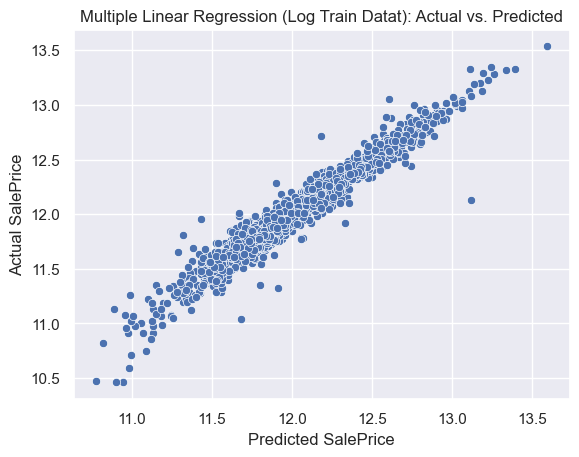

In [26]:
sns.scatterplot(x = lm.predict(X_train_drop), y = np.log(y_train_drop))
plt.title('Multiple Linear Regression (Log Train Datat): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

Text(0, 0.5, 'Actual SalePrice')

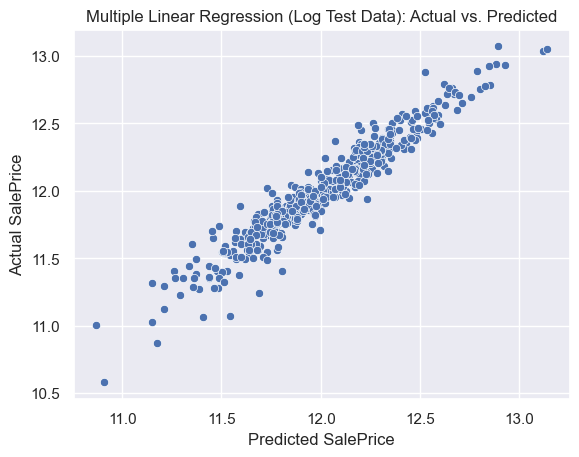

In [27]:
sns.scatterplot(x = lm.predict(X_test_drop), y = np.log(y_test_drop))
plt.title('Multiple Linear Regression (Log Test Data): Actual vs. Predicted')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')

## Log Transformation - Cross Validation

In [28]:


lm = LinearRegression()

lm_drop_cv = cross_val_score(estimator = lm, X = features_dum_drop, y = np.log(response), cv = kf, scoring = 'r2')


In [29]:
print('Mean cross-validation score: ' + str(lm_drop_cv.mean()))
print('Std dev cross-validation score: ' + str(lm_drop_cv.std()))

Mean cross-validation score: 0.9129836340608273
Std dev cross-validation score: 0.0172456099321005


<Axes: >

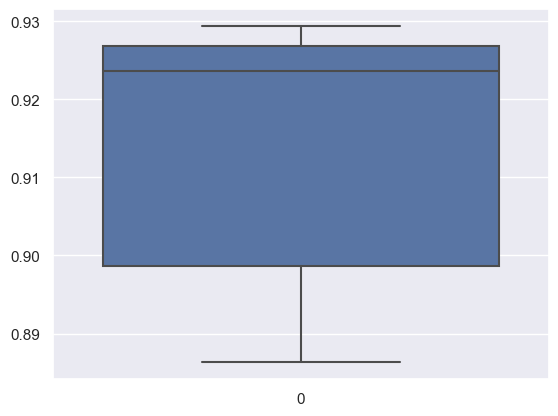

In [30]:
sns.boxplot(lm_drop_cv)

# Model Results Export

In [31]:
lm_results = pd.DataFrame(data = {'Model Number': np.linspace(1,5,5),
                                      'Mulitple Linear Regression_Drop': lm_drop_cv
                                     }
                             )

lm_results

,Model Number,Mulitple Linear Regression_Drop
0,1.0,0.923613
1,2.0,0.886358
2,3.0,0.929390
3,4.0,0.926848
4,5.0,0.898709


In [32]:
lm_train_test_score

,Model,Train Score,Test Score
0,Mulitple Linear Regression_Drop,0.946416,0.923613


In [33]:

current_directory = os.getcwd()

dataframes = {'lm_results': lm_results,
             'lm_train_test_score': lm_train_test_score}


for name, df in dataframes.items():

    file_path = os.path.join(current_directory, f"{name}.csv")
    
    df.to_csv(file_path, sep='\t', index=False)